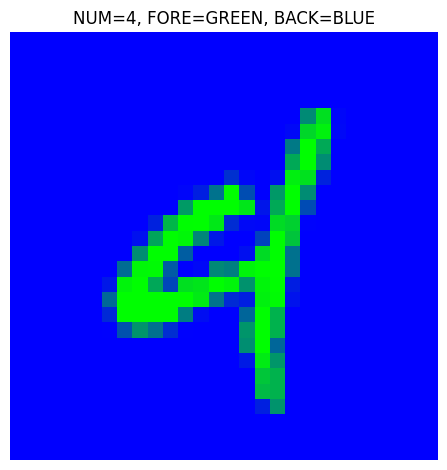

In [3]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
idx = np.random.randint(0, len(mnist))  # 0~9 사이의 숫자
image, label = mnist[idx]
pil_image = transforms.ToPILImage()(image)

# 전경과 배경 색상을 무작위로 선택합니다.
fg_color, fg_label = get_random_rainbow_color()
bg_color, bg_label = get_random_rainbow_color()

# 전경과 배경 색상이 같지 않도록 보장합니다.
while bg_color == fg_color:
  bg_color, bg_label = get_random_rainbow_color()

# 선택된 색상으로 숫자 이미지를 색칠합니다.
colored_digit = colorize_digit(pil_image, fg_color, bg_color)

if image is not None:
  # 최종 이미지를 표시합니다.
  final_image = overlay_digit_on_background(colored_digit)
  plt.imshow(final_image)
  plt.axis('off')  # 축을 비활성화합니다.
  plt.title(f'NUM={label}, FORE={fg_label}, BACK={bg_label}')

  # 레이아웃을 조정하고 화면에 표시합니다.
  plt.tight_layout()
  plt.show()

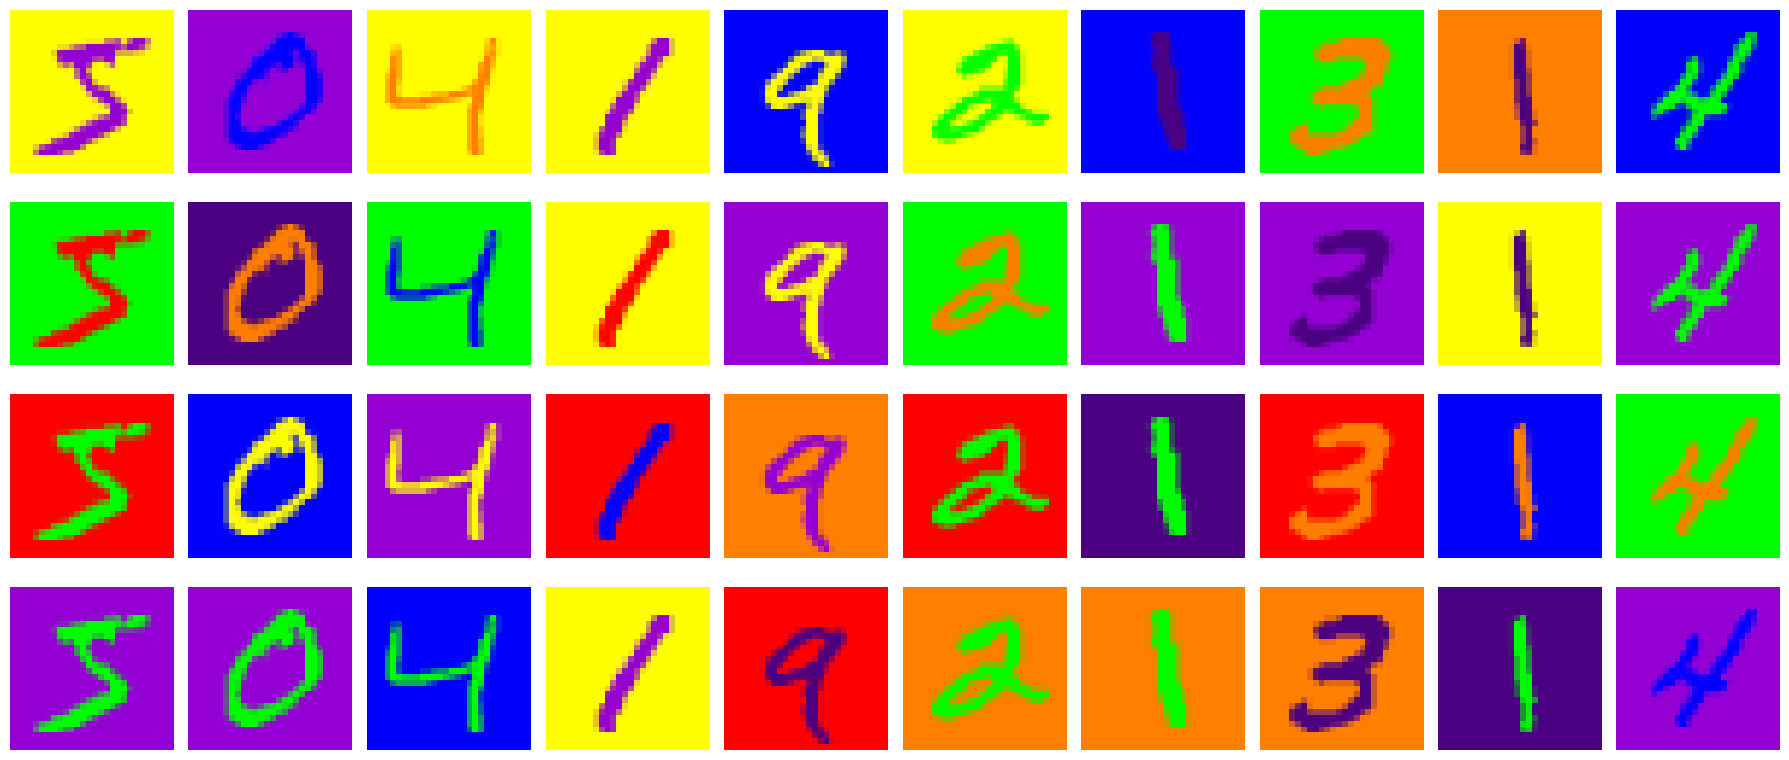

In [4]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    return RAINBOW_COLORS[np.random.randint(0, len(RAINBOW_COLORS))]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
fig, axes = plt.subplots(4, 10, figsize=(18, 8))  # 4개의 도메인(행)을 생성합니다.

for row in range(4):  # 4개의 도메인(행)에 대해 반복합니다.
    for col in range(10):  # 0부터 9까지의 숫자를 표시합니다.
        image, label = mnist[col]
        pil_image = transforms.ToPILImage()(image)

        # 전경과 배경 색상을 무작위로 선택합니다.
        fg_color = get_random_rainbow_color()
        bg_color = get_random_rainbow_color()

        # 전경과 배경 색상이 같지 않도록 보장합니다.
        while bg_color == fg_color:
            bg_color = get_random_rainbow_color()

        # 선택된 색상으로 숫자 이미지를 색칠합니다.
        colored_digit = colorize_digit(pil_image, fg_color, bg_color)

        # 최종 이미지를 표시합니다.
        final_image = overlay_digit_on_background(colored_digit)
        axes[row, col].imshow(final_image)
        # axes[row, col].imshow(image[0], cmap='gray')
        axes[row, col].axis('off')  # 축을 비활성화합니다.

# 레이아웃을 조정하고 화면에 표시합니다.
plt.tight_layout()
plt.show()

In [5]:
#모델 학습을 위한 데이터 적재
#transform = transforms.Compose([transforms.ToTensor()])
#mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

X_color = []
y_bg = []
y_fg = []
y_digit = []

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGB')
    return colored_digit

for i in range(len(mnist)):
    image, label = mnist[i]
    pil_image = transforms.ToPILImage()(image)

    # 전경과 배경 색상을 무작위로 선택합니다.
    fg_color, fg_label = get_random_rainbow_color()
    bg_color, bg_label = get_random_rainbow_color()

    # 전경과 배경 색상이 같지 않도록 보장합니다.
    while bg_color == fg_color:
        bg_color, bg_label = get_random_rainbow_color()

    # 전경 및 배경 색상이 적용된 숫자 이미지를 생성합니다.
    colored_digit = colorize_digit(pil_image, fg_color, bg_color)

    # 결과 이미지를 numpy 배열로 변환하고 리스트에 추가합니다.
    X_color.append(np.array(colored_digit))
    y_digit.append(label)
    y_fg.append(fg_label)
    y_bg.append(bg_label)

#리스트를 Numpy로 변환
X_color = np.array(X_color)
y_digit = np.array(y_digit)
y_fg = np.array(y_fg)
y_bg = np.array(y_bg)

# 데이터 형태를 확인합니다.
print(f"X_color.shape: {X_color.shape}")
print(f"y_digit.shape: {y_digit.shape}")
print(f"y_fg.shape: {y_fg.shape}")
print(f"y_bg.shape: {y_bg.shape}")

X_color.shape: (60000, 28, 28, 3)
y_digit.shape: (60000,)
y_fg.shape: (60000,)
y_bg.shape: (60000,)


In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# X_color를 (60000, 28, 28, 3)에서 (60000, 2352)로 변환 (flatten)
X_color = np.array(X_color).reshape(-1, 28 * 28 * 3)

# 변환된 X_color_flat의 shape 확인
print(X_color.shape)  # (60000, 2352)

# X_color와 y_fg, y_bg, y_digit에 대한 훈련/검증 세트를 나누기
X_train, X_test = X_color[:50000], X_color[50000:]
y_train_fg, y_test_fg = y_fg[:50000], y_fg[50000:]
y_train_bg, y_test_bg = y_bg[:50000], y_bg[50000:]
y_train_digit, y_test_digit = y_digit[:50000], y_digit[50000:]

# X_train, y_train_fg, y_train_bg, y_train_digit을 한 번에 훈련/검증 세트로 나누기
X_train_split, X_val_split, y_train_fg_split, y_val_fg_split, y_train_bg_split, y_val_bg_split, y_train_digit_split, y_val_digit_split = train_test_split(
    X_train, y_train_fg, y_train_bg, y_train_digit, test_size=0.1, random_state=42
)

(60000, 2352)


In [7]:
# RandomForest 모델

import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model_fg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_digit = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
start_time_fg = time.time()
rf_model_fg.fit(X_train_split, y_train_fg_split)
end_time_fg = time.time()

start_time_bg = time.time()
rf_model_bg.fit(X_train_split, y_train_bg_split)
end_time_bg = time.time()

start_time_digit = time.time()
rf_model_digit.fit(X_train_split, y_train_digit_split)
end_time_digit = time.time()

# 검증 데이터로 예측
start_time_fg_val = time.time()
y_val_fg_pred = rf_model_fg.predict(X_val_split)
end_time_fg_val = time.time()

start_time_bg_val = time.time()
y_val_bg_pred = rf_model_bg.predict(X_val_split)
end_time_bg_val = time.time()

start_time_digit_val = time.time()
y_val_digit_pred = rf_model_digit.predict(X_val_split)
end_time_digit_val = time.time()

training_time_fg = end_time_fg - start_time_fg
training_time_bg = end_time_bg - start_time_bg
training_time_digit = end_time_digit - start_time_digit

training_time_fg_val = end_time_fg_val - start_time_fg_val
training_time_bg_val = end_time_bg_val - start_time_bg_val
training_time_digit_val = end_time_digit_val - start_time_digit_val

accuracy_fg_rf = accuracy_score(y_val_fg_split, y_val_fg_pred)
accuracy_bg_rf = accuracy_score(y_val_bg_split, y_val_bg_pred)
accuracy_digit_rf = accuracy_score(y_val_digit_split, y_val_digit_pred)

print(f"Random Forest 전경 색상(fg) 정확도: {accuracy_fg_rf:.4f}")
print(f"Random Forest 전경 색상(fg) 학습 시간: {training_time_fg:.2f} 초")
print(f"Random Forest Validation 전경 색상(fg) 예측 시간: {training_time_fg_val:.2f} 초")

print(f"Random Forest 배경 색상(bg) 정확도: {accuracy_bg_rf:.4f}")
print(f"Random Forest 배경 색상(bg) 학습 시간: {training_time_bg:.2f} 초")
print(f"Random Forest Validation 배경 색상(bg) 예측 시간: {training_time_bg_val:.2f} 초")

print(f"Random Forest 숫자(digit) 정확도: {accuracy_digit_rf:.4f}")
print(f"Random Forest 숫자(digit) 학습 시간: {training_time_digit:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {training_time_digit_val:.2f} 초")

Random Forest 전경 색상(fg) 정확도: 0.9990
Random Forest 전경 색상(fg) 학습 시간: 51.58 초
Random Forest Validation 전경 색상(fg) 예측 시간: 0.17 초
Random Forest 배경 색상(bg) 정확도: 1.0000
Random Forest 배경 색상(bg) 학습 시간: 22.50 초
Random Forest Validation 배경 색상(bg) 예측 시간: 0.07 초
Random Forest 숫자(digit) 정확도: 0.9262
Random Forest 숫자(digit) 학습 시간: 123.95 초
Random Forest Validation 숫자(digit) 예측 시간: 0.32 초


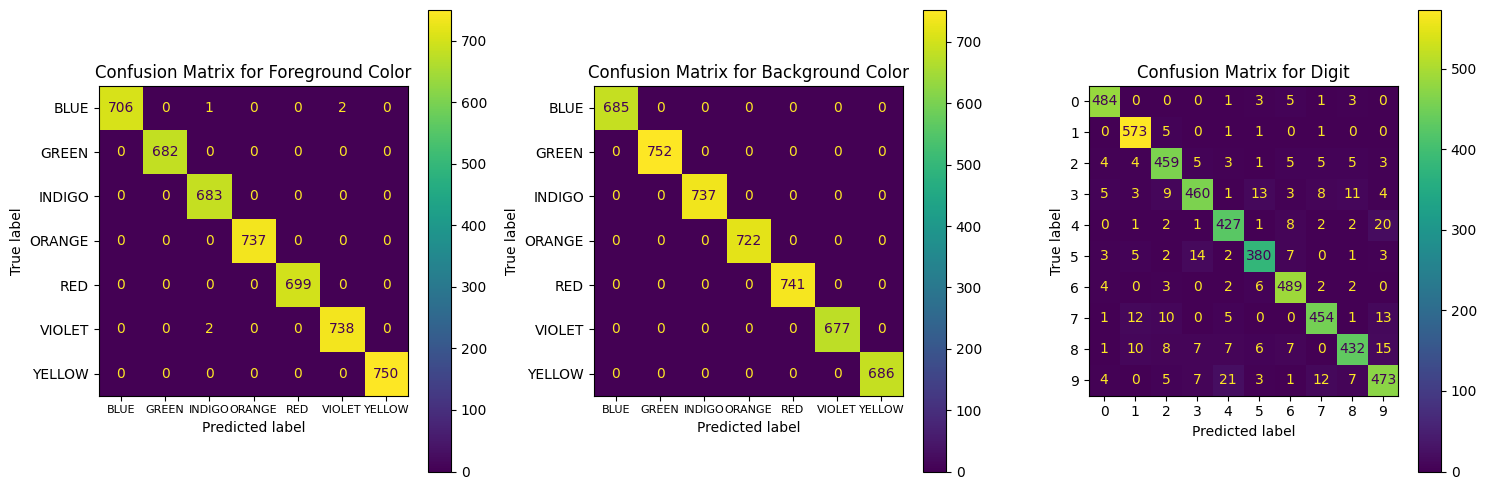

In [8]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix 생성
confusion_matrix_fg = confusion_matrix(y_val_fg_split, y_val_fg_pred)
confusion_matrix_bg = confusion_matrix(y_val_bg_split, y_val_bg_pred)
confusion_matrix_digit = confusion_matrix(y_val_digit_split, y_val_digit_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg, display_labels=np.unique(y_val_fg_split))
cmd_fg.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Foreground Color')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 배경 색상(bg)
cmd_bg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg, display_labels=np.unique(y_val_bg_split))
cmd_bg.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix for Background Color')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 숫자(digit)
cmd_digit = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit)
cmd_digit.plot(ax=axes[2])
axes[2].set_title('Confusion Matrix for Digit')

# 출력
plt.tight_layout()
plt.show()


In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM 모델 초기화
svm_model_fg = SVC(random_state=42)
svm_model_bg = SVC(random_state=42)
svm_model_digit = SVC(random_state=42)

# 모델 학습 및 시간 측정
start_time_fg = time.time()
svm_model_fg.fit(X_train_split, y_train_fg_split)
train_time_fg = time.time() - start_time_fg

start_time_bg = time.time()
svm_model_bg.fit(X_train_split, y_train_bg_split)
train_time_bg = time.time() - start_time_bg

start_time_digit = time.time()
svm_model_digit.fit(X_train_split, y_train_digit_split)
train_time_digit = time.time() - start_time_digit

print(f"SVM 전경 색상(fg) 학습 시간: {train_time_fg:.4f}초")
print(f"SVM 배경 색상(bg) 학습 시간: {train_time_bg:.4f}초")
print(f"SVM 숫자(digit) 학습 시간: {train_time_digit:.4f}초")

# 검증 데이터로 예측
start_pred_time_fg = time.time()
y_val_fg_pred = svm_model_fg.predict(X_val_split)
pred_time_fg = time.time() - start_pred_time_fg

start_pred_time_bg = time.time()
y_val_bg_pred = svm_model_bg.predict(X_val_split)
pred_time_bg = time.time() - start_pred_time_bg

start_pred_time_digit = time.time()
y_val_digit_pred = svm_model_digit.predict(X_val_split)
pred_time_digit = time.time() - start_pred_time_digit

# 정확도 평가
accuracy_fg_svm = accuracy_score(y_val_fg_split, y_val_fg_pred)
print(f"SVM 전경 색상(fg) 정확도: {accuracy_fg_svm:.4f}")
print(f"SVM 전경 색상(fg) 예측 시간: {pred_time_fg:.4f}초")

accuracy_bg_svm = accuracy_score(y_val_bg_split, y_val_bg_pred)
print(f"SVM 배경 색상(bg) 정확도: {accuracy_bg_svm:.4f}")
print(f"SVM 배경 색상(bg) 예측 시간: {pred_time_bg:.4f}초")

accuracy_digit_svm = accuracy_score(y_val_digit_split, y_val_digit_pred)
print(f"SVM 숫자(digit) 정확도: {accuracy_digit_svm:.4f}")
print(f"SVM 숫자(digit) 예측 시간: {pred_time_digit:.4f}초")


In [ ]:
# Confusion Matrix 생성

confusion_matrix_fg = confusion_matrix(y_val_fg_split, y_val_fg_pred)
confusion_matrix_bg = confusion_matrix(y_val_bg_split, y_val_bg_pred)
confusion_matrix_digit = confusion_matrix(y_val_digit_split, y_val_digit_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg, display_labels=np.unique(y_val_fg_split))
cmd_fg.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Foreground Color (fg)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 배경 색상(bg)
cmd_bg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg, display_labels=np.unique(y_val_bg_split))
cmd_bg.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix for Background Color (bg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 숫자(digit)
cmd_digit = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit)
cmd_digit.plot(ax=axes[2])
axes[2].set_title('Confusion Matrix for Digit')

# 레이아웃 정리
plt.tight_layout()
plt.show()

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN 모델 초기화
knn_model_fg = KNeighborsClassifier(n_neighbors=5)
knn_model_bg = KNeighborsClassifier(n_neighbors=5)
knn_model_digit = KNeighborsClassifier(n_neighbors=5)

# 모델 학습 및 시간 측정
start_time_fg = time.time()
knn_model_fg.fit(X_train_split, y_train_fg_split)
train_time_fg = time.time() - start_time_fg

start_time_bg = time.time()
knn_model_bg.fit(X_train_split, y_train_bg_split)
train_time_bg = time.time() - start_time_bg

start_time_digit = time.time()
knn_model_digit.fit(X_train_split, y_train_digit_split)
train_time_digit = time.time() - start_time_digit

print(f"KNN 전경 색상(fg) 학습 시간: {train_time_fg:.4f}초")
print(f"KNN 배경 색상(bg) 학습 시간: {train_time_bg:.4f}초")
print(f"KNN 숫자(digit) 학습 시간: {train_time_digit:.4f}초")

# 검증 데이터로 예측 및 시간 측정
start_pred_time_fg = time.time()
y_val_fg_pred = knn_model_fg.predict(X_val_split)
pred_time_fg = time.time() - start_pred_time_fg

start_pred_time_bg = time.time()
y_val_bg_pred = knn_model_bg.predict(X_val_split)
pred_time_bg = time.time() - start_pred_time_bg

start_pred_time_digit = time.time()
y_val_digit_pred = knn_model_digit.predict(X_val_split)
pred_time_digit = time.time() - start_pred_time_digit

# 정확도 평가
accuracy_fg_knn = accuracy_score(y_val_fg_split, y_val_fg_pred)
print(f"KNN 전경 색상(fg) 정확도: {accuracy_fg_knn:.4f}")
print(f"KNN 전경 색상(fg) 예측 시간: {pred_time_fg:.4f}초")

accuracy_bg_knn = accuracy_score(y_val_bg_split, y_val_bg_pred)
print(f"KNN 배경 색상(bg) 정확도: {accuracy_bg_knn:.4f}")
print(f"KNN 배경 색상(bg) 예측 시간: {pred_time_bg:.4f}초")

accuracy_digit_knn = accuracy_score(y_val_digit_split, y_val_digit_pred)
print(f"KNN 숫자(digit) 정확도: {accuracy_digit_knn:.4f}")
print(f"KNN 숫자(digit) 예측 시간: {pred_time_digit:.4f}초")

In [ ]:
# Confusion Matrix 생성
confusion_matrix_fg = confusion_matrix(y_val_fg_split, y_val_fg_pred)
confusion_matrix_bg = confusion_matrix(y_val_bg_split, y_val_bg_pred)
confusion_matrix_digit = confusion_matrix(y_val_digit_split, y_val_digit_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg, display_labels=np.unique(y_val_fg_split))
cmd_fg.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Foreground Color (fg)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 배경 색상(bg)
cmd_bg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg, display_labels=np.unique(y_val_bg_split))
cmd_bg.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix for Background Color (bg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8)

# 숫자(digit)
cmd_digit = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit)
cmd_digit.plot(ax=axes[2])
axes[2].set_title('Confusion Matrix for Digit')

# 레이아웃 정리
plt.tight_layout()
plt.show()

<h1> Data Processing </h1>

In [ ]:
# Data Binarization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# 1. 데이터 분할
# 데이터를 평탄화 (flatten)하여 RandomForest에서 사용할 수 있도록 변환
X_color_flat = X_color.reshape(X_color.shape[0], -1)

# 90% 훈련+검증 / 10% 테스트로 분할
X_train_val, X_test, y_fg_train_val, y_fg_test, y_bg_train_val, y_bg_test, y_digit_train_val, y_digit_test = train_test_split(
    X_color_flat, y_fg, y_bg, y_digit, test_size=0.1, random_state=42
)

# 훈련+검증 데이터를 다시 훈련/검증 세트로 나눔 (90% 훈련 / 10% 검증)
X_train, X_val, y_fg_train, y_fg_val, y_bg_train, y_bg_val, y_digit_train, y_digit_val = train_test_split(
    X_train_val, y_fg_train_val, y_bg_train_val, y_digit_train_val, test_size=0.1, random_state=42
)

# 2. Random Forest 모델 학습 및 검증
# 모델 초기화
rf_digit = RandomForestClassifier(n_estimators=100, random_state=42)

# 학습 및 시간 측정
start_digit = time.time()
rf_digit.fit(X_train, y_digit_train)
end_digit = time.time()

# 검증 데이터로 예측
val_start_digit = time.time()
y_digit_pred = rf_digit.predict(X_val)
val_end_digit = time.time()

# 3. 정확도 계산
accuracy_digit_binarization = accuracy_score(y_digit_val, y_digit_pred)

# 학습 및 예측 시간 계산
training_time_digit_binarization = end_digit - start_digit
validation_time_digit_binarization = val_end_digit - val_start_digit

# 4. 결과 출력
print(f"Data Binarization")
print(f"Random Forest 숫자(digit) 정확도: {accuracy_digit_binarization:.4f}")
print(f"Random Forest 숫자(digit) 학습 시간: {training_time_digit_binarization:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {validation_time_digit_binarization:.2f} 초")


Min-Max Scaling

In [ ]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#모델 학습을 위한 데이터 적재
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

X_color = []
y_bg = []
y_fg = []
y_digit = []

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGB')
    return colored_digit

for i in range(len(mnist)):
    image, label = mnist[i]
    pil_image = transforms.ToPILImage()(image)

    # 전경과 배경 색상을 무작위로 선택합니다.
    fg_color, fg_label = get_random_rainbow_color()
    bg_color, bg_label = get_random_rainbow_color()

    # 전경과 배경 색상이 같지 않도록 보장합니다.
    while bg_color == fg_color:
        bg_color, bg_label = get_random_rainbow_color()

    # 전경 및 배경 색상이 적용된 숫자 이미지를 생성합니다.
    colored_digit = colorize_digit(pil_image, fg_color, bg_color)

    # 결과 이미지를 numpy 배열로 변환하고 리스트에 추가합니다.
    X_color.append(np.array(colored_digit))
    y_digit.append(label)
    y_fg.append(fg_label)
    y_bg.append(bg_label)

#리스트를 Numpy로 변환
X_color = np.array(X_color)
y_digit = np.array(y_digit)
y_fg = np.array(y_fg)
y_bg = np.array(y_bg)

# 데이터 형태를 확인합니다.
print(f"X_color.shape: {X_color.shape}")
print(f"y_digit.shape: {y_digit.shape}")
print(f"y_fg.shape: {y_fg.shape}")
print(f"y_bg.shape: {y_bg.shape}")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 데이터 평탄화 (flatten)
X_color_flattened = X_color.reshape(-1, 28 * 28 * 3)

# 훈련, 테스트 데이터 분할 (90% 훈련+검증, 10% 테스트)
X_train_val, X_test, y_fg_train_val, y_fg_test, y_bg_train_val, y_bg_test, y_digit_train_val, y_digit_test = train_test_split(
    X_color_flattened, y_fg, y_bg, y_digit, test_size=0.1, random_state=42
)

# 훈련, 검증 데이터 분할 (90% 훈련, 10% 검증)
X_train, X_val, y_fg_train, y_fg_val, y_bg_train, y_bg_val, y_digit_train, y_digit_val = train_test_split(
    X_train_val, y_fg_train_val, y_bg_train_val, y_digit_train_val, test_size=0.1, random_state=42
)

# 정규화 (훈련 데이터 기준으로 fit)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 최종 데이터 형태 확인
print(f"훈련 데이터 크기: {X_train_scaled.shape}")
print(f"검증 데이터 크기: {X_val_scaled.shape}")
print(f"테스트 데이터 크기: {X_test_scaled.shape}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# RandomForest 모델 초기화
rf_model_digit = RandomForestClassifier(n_estimators=100, random_state=42)

# 숫자(digit) 학습 및 시간 측정
start_time_digit = time.time()
rf_model_digit.fit(X_train_scaled, y_digit_train)
end_time_digit = time.time()

# 검증 데이터로 예측
start_time_digit_val = time.time()
y_val_digit_pred = rf_model_digit.predict(X_val_scaled)
end_time_digit_val = time.time()

# 학습 및 예측 시간 계산
training_time_digit_MinMax = end_time_digit - start_time_digit
validation_time_digit_MinMax = end_time_digit_val - start_time_digit_val

# 정확도 계산
accuracy_digit_rf_MinMax = accuracy_score(y_digit_val, y_val_digit_pred)

# 결과 출력
print(f"Data Min-Max Scaling with Random Forest")
print(f"Random Forest 숫자(digit) 정확도: {accuracy_digit_rf_MinMax:.4f}")
print(f"Random Forest 숫자(digit) 학습 시간: {training_time_digit_MinMax:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {validation_time_digit_MinMax:.2f} 초")

Grayscale

In [ ]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#모델 학습을 위한 데이터 적재
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

X_color = []
y_bg = []
y_fg = []
y_digit = []

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGB')
    return colored_digit

for i in range(len(mnist)):
    image, label = mnist[i]
    pil_image = transforms.ToPILImage()(image)

    # 전경과 배경 색상을 무작위로 선택합니다.
    fg_color, fg_label = get_random_rainbow_color()
    bg_color, bg_label = get_random_rainbow_color()

    # 전경과 배경 색상이 같지 않도록 보장합니다.
    while bg_color == fg_color:
        bg_color, bg_label = get_random_rainbow_color()

    # 전경 및 배경 색상이 적용된 숫자 이미지를 생성합니다.
    colored_digit = colorize_digit(pil_image, fg_color, bg_color)

    # 결과 이미지를 numpy 배열로 변환하고 리스트에 추가합니다.
    X_color.append(np.array(colored_digit))
    y_digit.append(label)
    y_fg.append(fg_label)
    y_bg.append(bg_label)

#리스트를 Numpy로 변환
X_color = np.array(X_color)
y_digit = np.array(y_digit)
y_fg = np.array(y_fg)
y_bg = np.array(y_bg)

# 데이터 형태를 확인합니다.
print(f"X_color.shape: {X_color.shape}")
print(f"y_digit.shape: {y_digit.shape}")
print(f"y_fg.shape: {y_fg.shape}")
print(f"y_bg.shape: {y_bg.shape}")

In [ ]:
# X_color 배열을 그레이스케일로 변환
X_color_gray = []

for img in X_color:
    # RGB 이미지를 Grayscale로 변환
    gray_image = Image.fromarray(img).convert('L')
    X_color_gray.append(np.array(gray_image))

X_color_gray = np.array(X_color_gray)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# 1. 데이터 준비 및 평탄화
# 그레이스케일 데이터의 형태: (n_samples, height, width)
# 평탄화: (n_samples, height * width)
X_color_gray_flat = X_color_gray.reshape(X_color_gray.shape[0], -1)

# 2. 데이터 분할
# 90% 훈련+검증 / 10% 테스트로 분할
X_train_val, X_test, y_fg_train_val, y_fg_test, y_bg_train_val, y_bg_test, y_digit_train_val, y_digit_test = train_test_split(
    X_color_gray_flat, y_fg, y_bg, y_digit, test_size=0.1, random_state=42
)

# 훈련+검증 데이터를 다시 훈련/검증 세트로 나눔 (90% 훈련 / 10% 검증)
X_train, X_val, y_fg_train, y_fg_val, y_bg_train, y_bg_val, y_digit_train, y_digit_val = train_test_split(
    X_train_val, y_fg_train_val, y_bg_train_val, y_digit_train_val, test_size=0.1, random_state=42
)

X_train, X_test = X_color[:50000], X_color[50000:]
y_train_fg, y_test_fg = y_fg[:50000], y_fg[50000:]
y_train_bg, y_test_bg = y_bg[:50000], y_bg[50000:]
y_train_digit, y_test_digit = y_digit[:50000], y_digit[50000:]

# 3. Random Forest 모델 학습
# 모델 초기화
rf_digit = RandomForestClassifier(n_estimators=100, random_state=42)

# 학습 및 시간 측정 - 숫자(digit)
start_digit = time.time()
rf_digit.fit(X_train, y_digit_train)
end_digit = time.time()

# 4. 검증 데이터로 예측
val_start_digit = time.time()
y_digit_pred = rf_digit.predict(X_val)
val_end_digit = time.time()

# 5. 정확도 계산
accuracy_digit_grayscale = accuracy_score(y_digit_val, y_digit_pred)

# 학습 및 예측 시간 계산
training_time_digit_grayscale = end_digit - start_digit
validation_time_digit_grayscale = val_end_digit - val_start_digit

# 6. 결과 출력
print(f"Data Gray Scale")
print(f"Random Forest 숫자(digit) 정확도: {accuracy_digit_grayscale:.4f}")
print(f"Random Forest 숫자(digit) 학습 시간: {training_time_digit_grayscale:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {validation_time_digit_grayscale:.2f} 초")

<h1> Data Augmentation</h1>

In [ ]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

#모델 학습을 위한 데이터 적재
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

X_color = []
y_bg = []
y_fg = []
y_digit = []

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGB')
    return colored_digit

for i in range(len(mnist)):
    image, label = mnist[i]
    pil_image = transforms.ToPILImage()(image)

    # 전경과 배경 색상을 무작위로 선택합니다.
    fg_color, fg_label = get_random_rainbow_color()
    bg_color, bg_label = get_random_rainbow_color()

    # 전경과 배경 색상이 같지 않도록 보장합니다.
    while bg_color == fg_color:
        bg_color, bg_label = get_random_rainbow_color()

    # 전경 및 배경 색상이 적용된 숫자 이미지를 생성합니다.
    colored_digit = colorize_digit(pil_image, fg_color, bg_color)

    # 결과 이미지를 numpy 배열로 변환하고 리스트에 추가합니다.
    X_color.append(np.array(colored_digit))
    y_digit.append(label)
    y_fg.append(fg_label)
    y_bg.append(bg_label)

#리스트를 Numpy로 변환
X_color = np.array(X_color)
y_digit = np.array(y_digit)
y_fg = np.array(y_fg)
y_bg = np.array(y_bg)

# 데이터 형태를 확인합니다.
print(f"X_color.shape: {X_color.shape}")
print(f"y_digit.shape: {y_digit.shape}")
print(f"y_fg.shape: {y_fg.shape}")
print(f"y_bg.shape: {y_bg.shape}")

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# X_color를 (60000, 28, 28, 3)에서 (60000, 2352)로 변환 (flatten)
X_color = np.array(X_color).reshape(-1, 28 * 28 * 3)

# 변환된 X_color_flat의 shape 확인
print(X_color.shape)  # (60000, 2352)

# X_color와 y_fg, y_bg, y_digit에 대한 훈련/검증 세트를 나누기
X_train, X_test = X_color[:50000], X_color[50000:]
y_train_fg, y_test_fg = y_fg[:50000], y_fg[50000:]
y_train_bg, y_test_bg = y_bg[:50000], y_bg[50000:]
y_train_digit, y_test_digit = y_digit[:50000], y_digit[50000:]

# X_train, y_train_fg, y_train_bg, y_train_digit을 한 번에 훈련/검증 세트로 나누기
X_train_split, X_val_split, y_train_fg_split, y_val_fg_split, y_train_bg_split, y_val_bg_split, y_train_digit_split, y_val_digit_split = train_test_split(
    X_train, y_train_fg, y_train_bg, y_train_digit, test_size=0.1, random_state=42

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from joblib import Parallel, delayed
import numpy as np
import time

# 데이터 평탄화 (flatten) 및 정규화 함수
def preprocess_data(X_color):
    X_color_flattened = X_color.reshape(-1, 28 * 28 * 3)
    scaler = MinMaxScaler()
    X_color_scaled = scaler.fit_transform(X_color_flattened)
    return X_color_scaled

# 데이터 전처리
X_color_scaled = preprocess_data(X_color)

# 훈련, 검증, 테스트 데이터 분할
X_train_val, X_test, y_fg_train_val, y_fg_test, y_bg_train_val, y_bg_test, y_digit_train_val, y_digit_test = train_test_split(
    X_color_scaled, y_fg, y_bg, y_digit, test_size=0.1, random_state=42
)
X_train, X_val, y_fg_train, y_fg_val, y_bg_train, y_bg_val, y_digit_train, y_digit_val = train_test_split(
    X_train_val, y_fg_train_val, y_bg_train_val, y_digit_train_val, test_size=0.1, random_state=42
)

# 회전 각도 리스트
rotation_angles = [5, 10, 15, 20, 25, 30]

# 병렬 처리 함수
def process_rotation(angle):
    print(f"\n===== 회전 각도: {angle}° =====")

    # ImageDataGenerator 설정
    datagen = ImageDataGenerator(
        rotation_range=angle,
        fill_mode='nearest'
    )

    # 증강 데이터 생성
    augmented_images = []
    augmented_digit_labels = []

    for i in range(len(X_color)):
        img = X_color[i].reshape((1, 28, 28, 3))
        digit_label = y_digit[i]

        augmented_iter = datagen.flow(img, batch_size=1)
        augmented_img = next(augmented_iter)[0].astype('uint8')

        augmented_images.append(augmented_img)
        augmented_digit_labels.append(digit_label)

    # Numpy 배열로 변환
    augmented_images = np.array(augmented_images)
    augmented_digit_labels = np.array(augmented_digit_labels)

    # 증강 데이터를 평탄화 및 정규화
    augmented_images_flat = augmented_images.reshape(-1, 28 * 28 * 3)
    scaler = MinMaxScaler()
    augmented_images_scaled = scaler.fit_transform(augmented_images_flat)

    # 원본 데이터와 증강 데이터를 결합
    final_X_color = np.concatenate([X_color_scaled, augmented_images_scaled], axis=0)
    final_y_digit = np.concatenate([y_digit, augmented_digit_labels], axis=0)

    # 데이터 분할
    X_train_val, X_test, y_digit_train_val, y_digit_test = train_test_split(
        final_X_color, final_y_digit, test_size=0.1, random_state=42
    )
    X_train, X_val, y_digit_train, y_digit_val = train_test_split(
        X_train_val, y_digit_train_val, test_size=0.1, random_state=42
    )

    # Random Forest 모델 선언
    rf_digit = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

    # 학습 및 시간 측정
    start_digit = time.time()
    rf_digit.fit(X_train, y_digit_train)
    end_digit = time.time()

    # 검증 데이터로 예측
    y_digit_pred = rf_digit.predict(X_val)

    # 정확도 계산
    accuracy_digit = accuracy_score(y_digit_val, y_digit_pred)

    # 결과 반환
    return {
        'rotation_angle': angle,
        'accuracy_digit': accuracy_digit,
        'training_time_digit': end_digit - start_digit
    }

# 병렬 처리로 회전 각도 테스트
start_total = time.time()
results = Parallel(n_jobs=-1)(delayed(process_rotation)(angle) for angle in rotation_angles)
end_total = time.time()

# 결과 출력
print("\n===== 모든 실험 결과 =====")
for res in results:
    print(f"\n회전 각도: {res['rotation_angle']}°")
    print(f"  숫자(digit) 정확도: {res['accuracy_digit']:.4f}, 학습 시간: {res['training_time_digit']:.2f} 초")

print(f"\n총 소요 시간: {(end_total - start_total) / 60:.2f} 분")
